In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('affinity_result.csv')
df

,receptor,seed_no,affinity
0,hpbcd,1,-5.9
1,sbebcd,1,-5.5
2,hpbcd,2,-6.0
3,sbebcd,2,-6.6
4,hpbcd,3,-5.4
5,sbebcd,3,-5.6
6,hpbcd,4,-6.5
7,sbebcd,4,-6.6
8,hpbcd,5,-5.4
9,sbebcd,5,-5.6


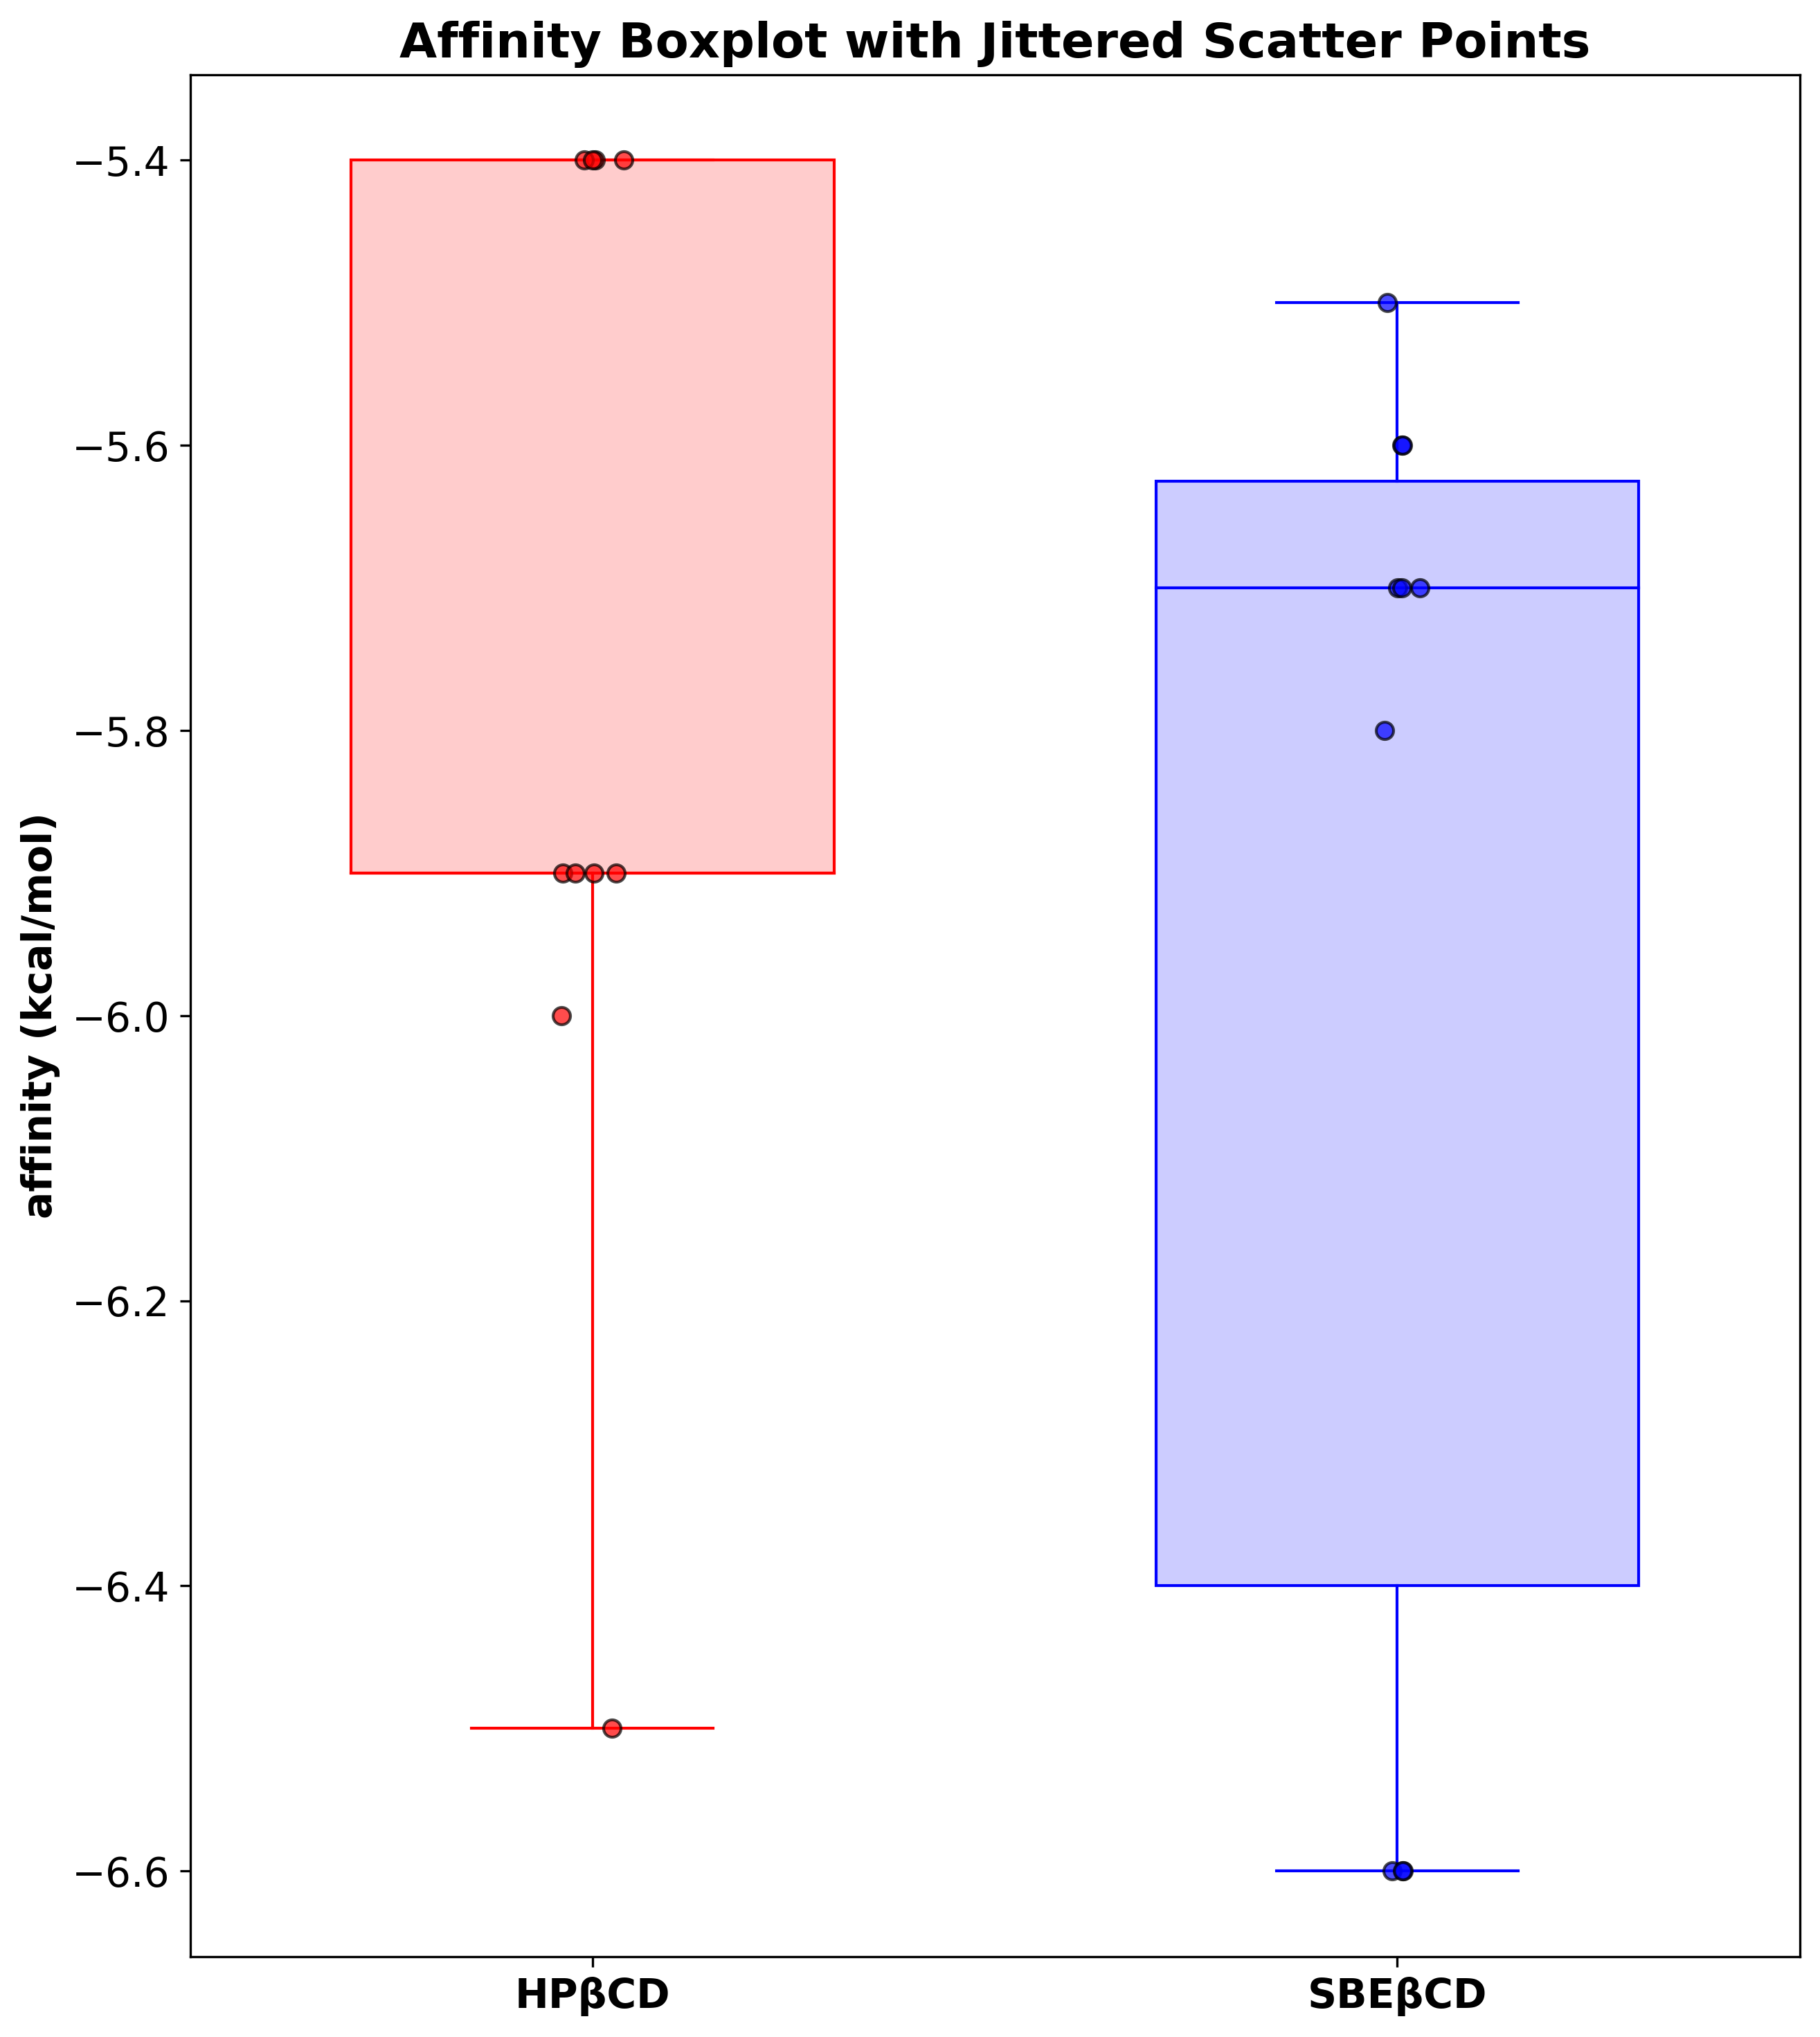

In [12]:
plt.rcParams.update({'font.size': 14}) # Updating the default font size for all plot elements

# Create the figure with an increased DPI
fig, ax = plt.subplots(figsize=(10, 12), dpi=300)

# Define the positions for the groups
positions = {'hpbcd': 1, 'sbebcd': 2}

# Define colors for the boxplot and scatter points
light_colors = {'hpbcd': '#ffcccc', 'sbebcd': '#ccccff'}
colors = {'hpbcd': '#ff0000', 'sbebcd': '#0000ff'}

# Group the DataFrame by 'group' column
groups = df.groupby('receptor')

# Plot each group with jittered scatter points
for name, group in groups:
    # Create the boxplot
    bp = ax.boxplot(group['affinity'], positions=[positions[name]], 
                    widths=0.6, patch_artist=True, 
                    boxprops=dict(facecolor=light_colors[name], color=colors[name]),
                    capprops=dict(color=colors[name]), whiskerprops=dict(color=colors[name]),
                    flierprops=dict(marker='o', color=colors[name], markeredgecolor=colors[name]),
                    medianprops=dict(color=colors[name]))
    
    # Add jitter and plot the scatter points
    jittered_x = positions[name] + 0.08 * np.random.rand(len(group)) - 0.04
    ax.scatter(jittered_x, group['affinity'], alpha=0.7, color=colors[name], edgecolor='k', zorder=3)

# Set x-axis labels with bold font
ax.set_xticks([positions['hpbcd'], positions['sbebcd']])
ax.set_xticklabels(['HPβCD', 'SBEβCD'], weight='bold')

# Set y-axis label with bold font
ax.set_ylabel('affinity (kcal/mol)', weight='bold')

# Set plot title with bold font
plt.title('Affinity Boxplot with Jittered Scatter Points', weight='bold')

# Save the figure with the same DPI as specified
plt.savefig('box-result.png', dpi=300)

# Show the plot
plt.show()



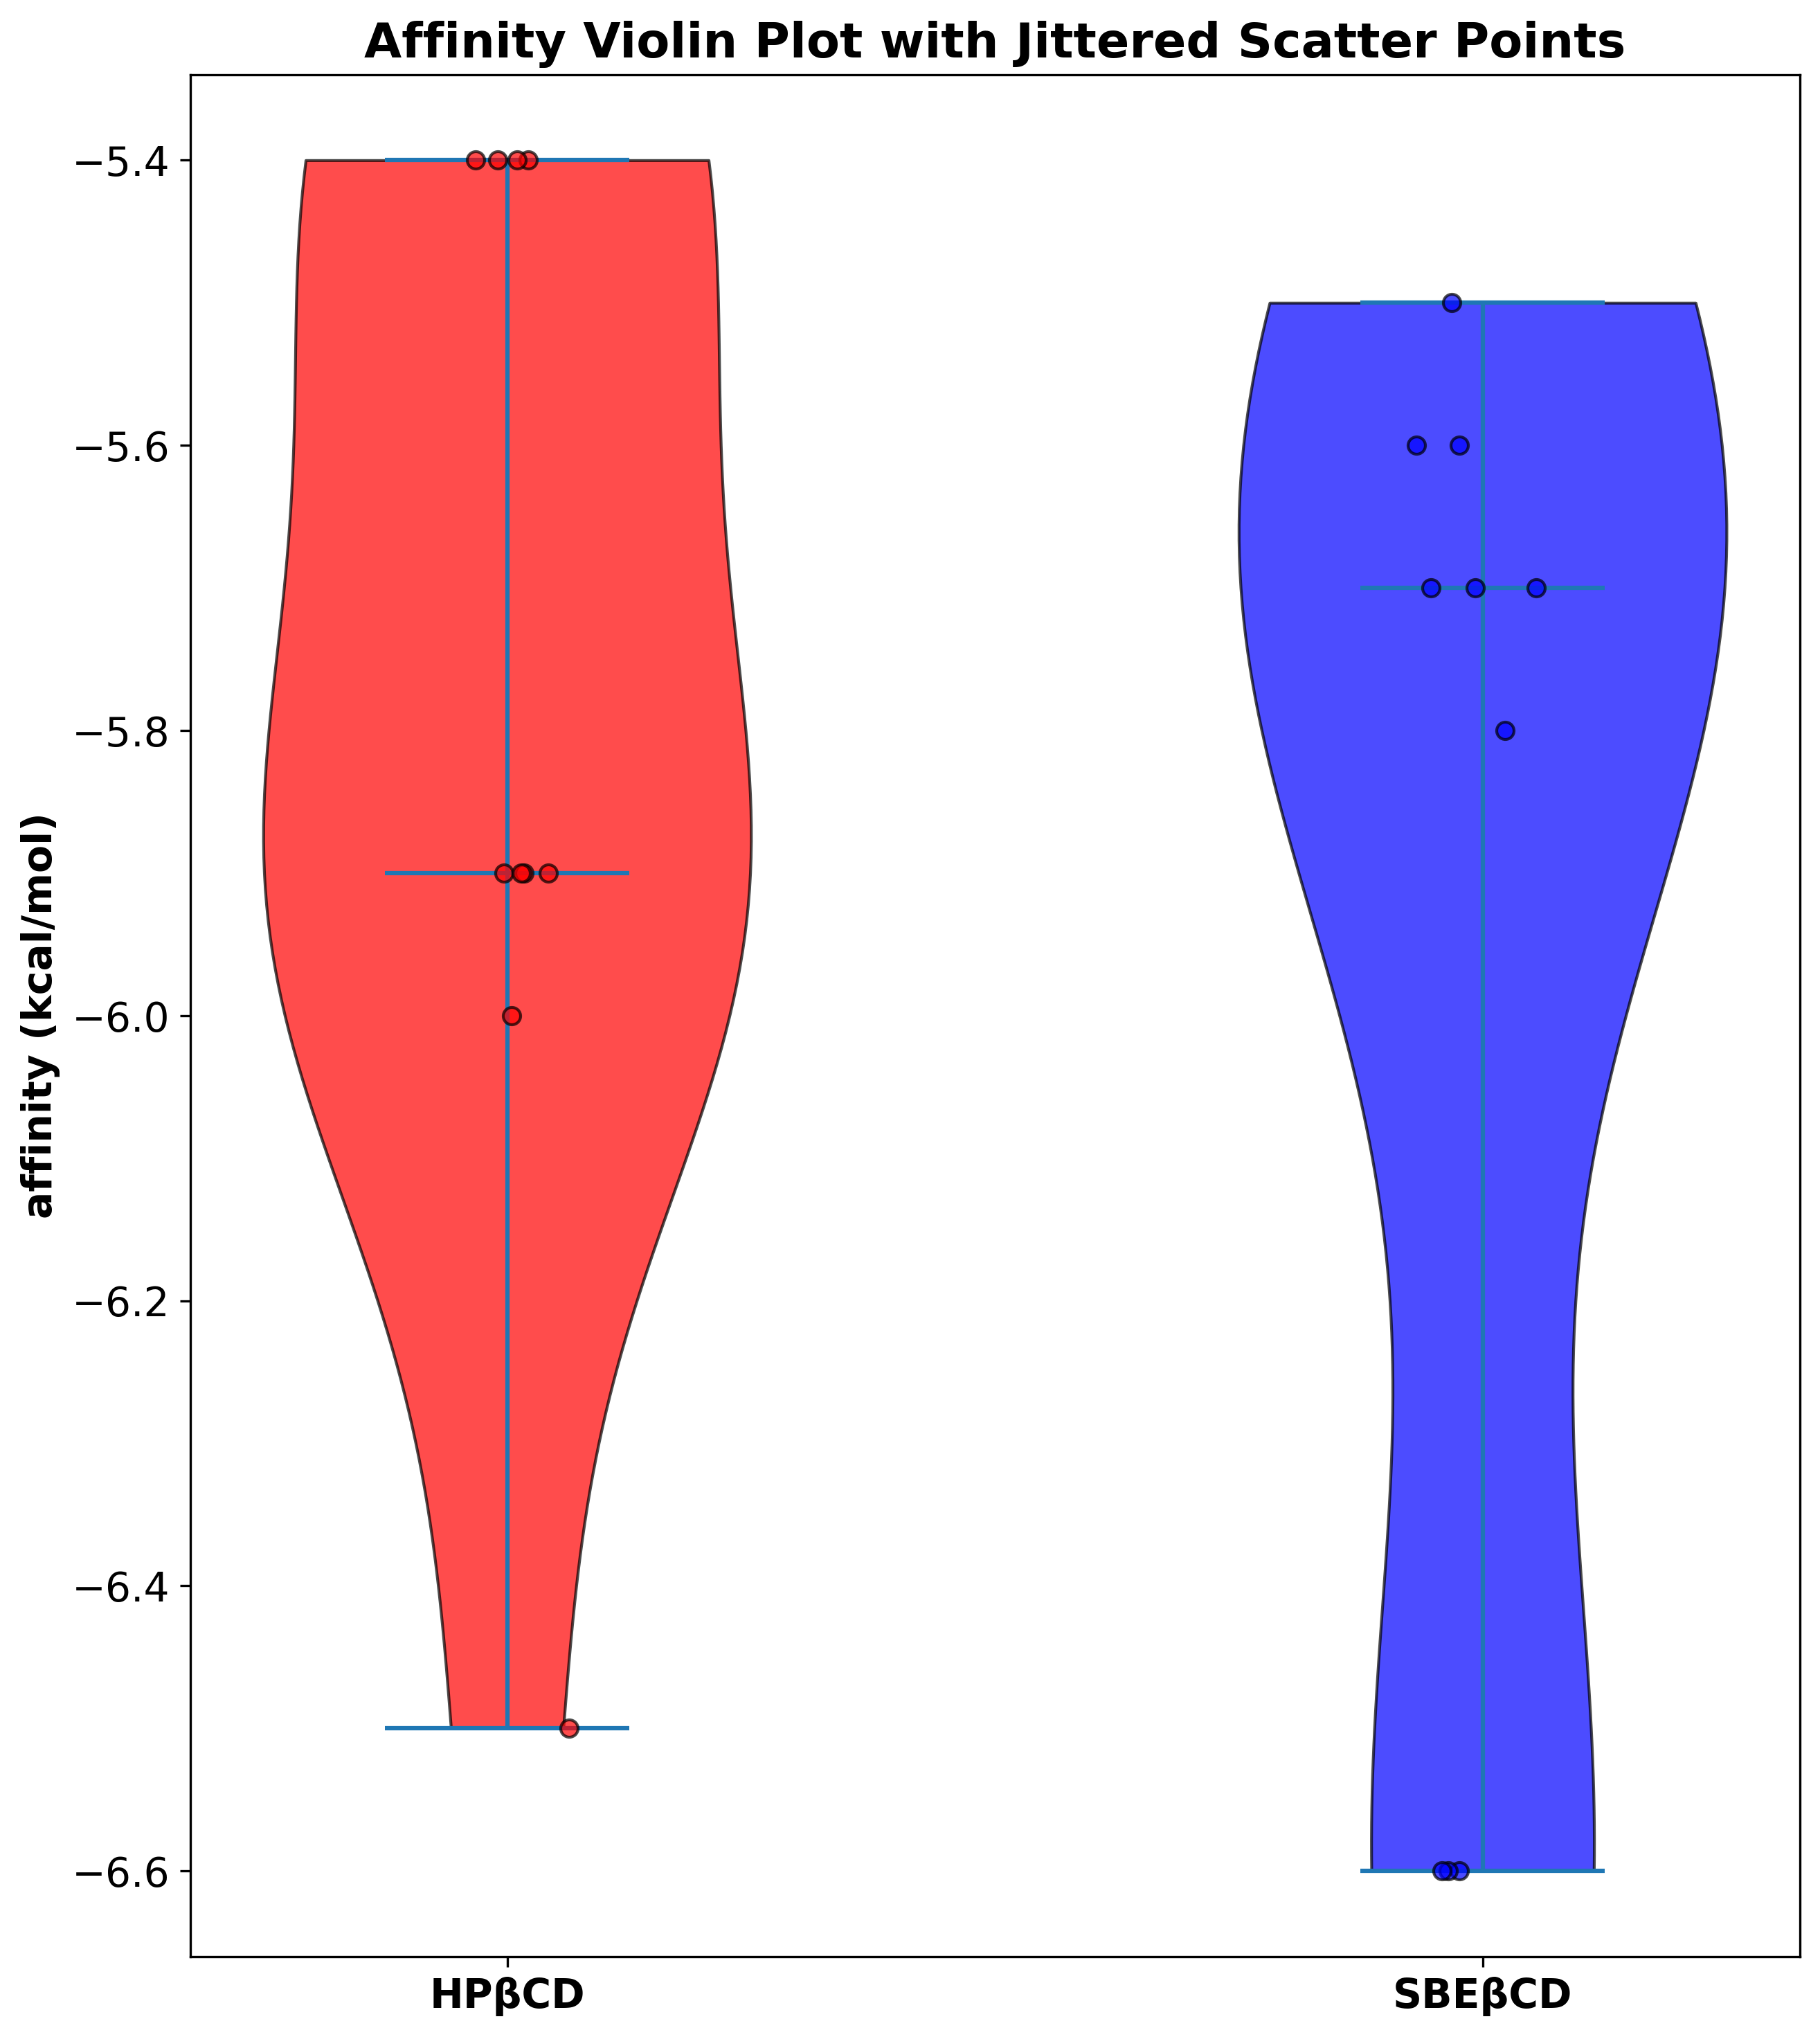

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is already loaded
# df = pd.read_csv('affinity_result.csv')

plt.rcParams.update({'font.size': 14})  # Updating the default font size for all plot elements

fig, ax = plt.subplots(figsize=(10, 12), dpi=300)  # Create the figure with an increased DPI

# Define the positions for the groups
positions = {'hpbcd': 1, 'sbebcd': 2}

# Define colors for the violin plot and scatter points
light_colors = {'hpbcd': '#ffcccc', 'sbebcd': '#ccccff'}
colors = {'hpbcd': '#ff0000', 'sbebcd': '#0000ff'}

# Group the DataFrame by 'receptor' column
groups = df.groupby('receptor')

data_to_plot = []
colors_to_plot = []
for name in positions.keys():
    if name in groups.groups.keys():  # Ensure the group exists
        group_data = groups.get_group(name)['affinity'].values
        data_to_plot.append(group_data)
        colors_to_plot.append(colors[name])

# Create the violin plot
vp = ax.violinplot(data_to_plot, positions=list(positions.values()), showmeans=False, showmedians=True, showextrema=True)

# Coloring each violin
for idx, pc in enumerate(vp['bodies']):
    pc.set_facecolor(colors_to_plot[idx])
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add jitter and plot the scatter points
for idx, name in enumerate(positions.keys()):
    if name in groups.groups.keys():
        group = groups.get_group(name)
        jittered_x = np.random.normal(positions[name], 0.04, size=len(group))
        ax.scatter(jittered_x, group['affinity'], alpha=0.7, color=colors[name], edgecolor='k', zorder=3)

ax.set_xticks([positions['hpbcd'], positions['sbebcd']])
ax.set_xticklabels(['HPβCD', 'SBEβCD'], weight='bold')

ax.set_ylabel('affinity (kcal/mol)', weight='bold')

plt.title('Affinity Violin Plot with Jittered Scatter Points', weight='bold')

plt.savefig('violin-result.png', dpi=300)  # Save the figure with the same DPI as specified

plt.show()
